<a href="https://colab.research.google.com/github/arthuremanuel/Artificial_Intelligence_Classes/blob/main/BBC_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition
https://www.kaggle.com/c/learn-ai-bbc/overview

Deliverable for Part 1:

A Jupyter notebook with exploratory data analysis (EDA) procedure, model building and training, and comparison with supervised learning.

**Development**
1. Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

In [ ]:
import pandas as pd

df = pd.read_csv('BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [ ]:
df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [ ]:
df.isnull().sum()

,0
ArticleId,0
Text,0
Category,0


In [ ]:
df['Category'].value_counts()

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


<Axes: >

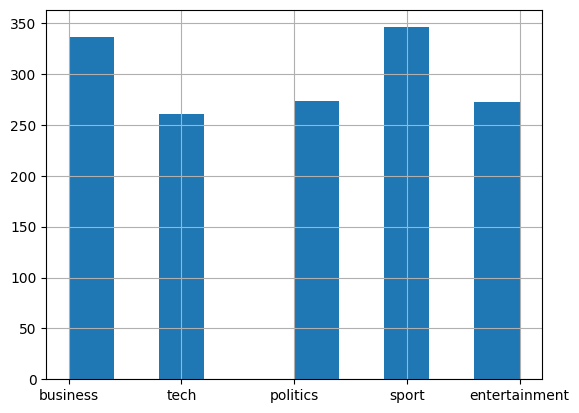

In [ ]:
df['Category'].hist()

**Word Count**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

word_counts = X.toarray().sum(axis=0)

word_freq = pd.Series(word_counts, index=vectorizer.get_feature_names_out())
word_freq = word_freq.sort_values(ascending=False)
word_freq

,0
the,35030
to,16665
of,13003
and,12399
in,11802
...,...
zephaniah,1
zheng,1
zonealarm,1
050505,1


<Axes: >

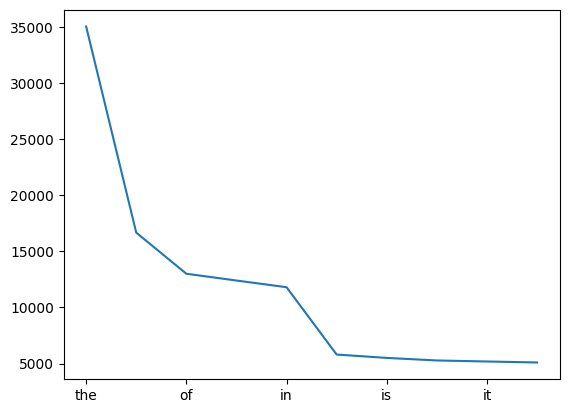

In [ ]:
word_freq[:10].plot()

<Axes: >

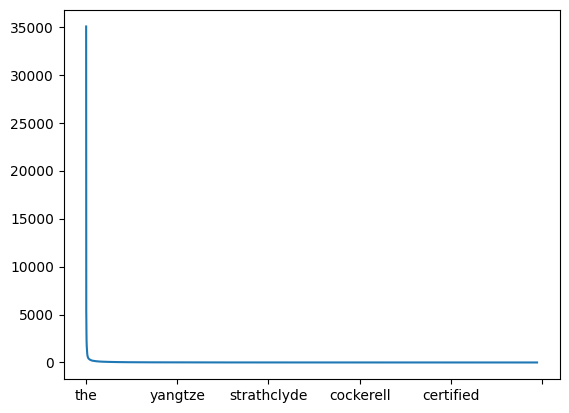

In [ ]:
word_freq[:-10].plot()

**Word Cloud**

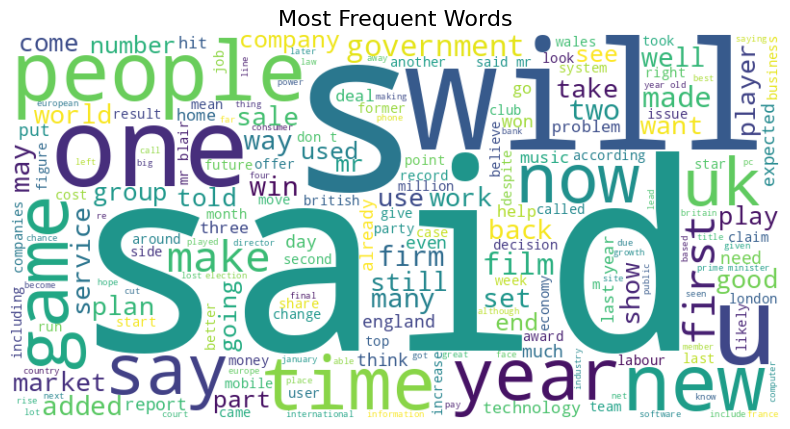

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Text'].astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words", fontsize=16)
plt.show()

**Generating Embeddings With TF-IDF**

TF-IDF (Term Frequency–Inverse Document Frequency) is a technique used to evaluate how important a word is to a document within a collection.

* **TF (Term Frequency):** how often a word appears in a document.
* **IDF (Inverse Document Frequency):** how rare the word is across all documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Text'])
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 171135 stored elements and shape (1490, 5000)>
  Coords	Values
  (0, 4951)	0.5172116715997075
  (0, 1671)	0.08680683715638825
  (0, 656)	0.03810405135225327
  (0, 2619)	0.05672629743135748
  (0, 1280)	0.042330114725000346
  (0, 2626)	0.15399620330404284
  (0, 1284)	0.05133206776801428
  (0, 883)	0.08614179352659534
  (0, 1515)	0.36056209222880303
  (0, 532)	0.05746796351107861
  (0, 1931)	0.18016402994855307
  (0, 863)	0.12699034417500105
  (0, 743)	0.02986553492661802
  (0, 1003)	0.05544119253608713
  (0, 4931)	0.11827965225097685
  (0, 1122)	0.23307609561159712
  (0, 2154)	0.036187153741815796
  (0, 2409)	0.05538992697606958
  (0, 184)	0.36542008993422403
  (0, 1378)	0.049789341296472486
  (0, 3418)	0.11653804780579856
  (0, 4508)	0.04877070902684671
  (0, 2015)	0.037562951348089596
  (0, 55)	0.07409922512131627
  (0, 4855)	0.056035822830078554
  :	:
  (1489, 4832)	0.06755194194511385
  (1489, 4881)	0.16388941743847635
  (

In [ ]:
tfidf_array = tfidf_matrix.toarray()
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)
tfidf_df

,000,000m,05,10,100,100m,102,104,10bn,11,...,younger,youngsters,youth,yuan,yugansk,yuganskneftegas,yukos,zealand,zero,zone
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.041666,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.026313,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.020443,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.082382,0.047199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.031479,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.039742,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1486,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1487,0.000000,0.0,0.0,0.048624,0.0,0.0,0.0,0.0,0.0,0.126501,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1488,0.000000,0.0,0.0,0.052061,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. Building and training models. [35 pts]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.decomposition import NMF

n_topics = 5
nmf = NMF(n_components=n_topics, random_state=42)
W_train = nmf.fit_transform(X_train_tfidf)  # Docs x topics
W_test = nmf.transform(X_test_tfidf)
H = nmf.components_       # topics x words
nmf

NMF(n_components=5, random_state=42)

In [ ]:
feature_names = vectorizer.get_feature_names_out()

def print_topics(H, feature_names, top_words=3):
    for topic_idx, topic in enumerate(H):
        top_features = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

print_topics(H, feature_names)

Topic 1: england, game, win
Topic 2: mr, labour, election
Topic 3: mobile, people, phone
Topic 4: film, best, awards
Topic 5: growth, said, economy


3. Compare with supervised learning [30 pts]

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(W_train, y_train)
clf

LogisticRegression(max_iter=1000)

In [ ]:
y_train_pred = clf.predict(W_train)
y_test_pred = clf.predict(W_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

print("\n[Train Performance]")
print(classification_report(y_train, y_train_pred))


[Train Performance]
               precision    recall  f1-score   support

     business       0.86      0.96      0.91       261
entertainment       0.96      0.76      0.85       227
     politics       0.96      0.81      0.88       218
        sport       0.82      0.99      0.90       283
         tech       0.91      0.88      0.90       203

     accuracy                           0.89      1192
    macro avg       0.90      0.88      0.89      1192
 weighted avg       0.90      0.89      0.89      1192



In [ ]:
print("\n[Test Performance]")
print(classification_report(y_test, y_test_pred))


[Test Performance]
               precision    recall  f1-score   support

     business       0.91      0.95      0.93        75
entertainment       1.00      0.78      0.88        46
     politics       0.92      0.88      0.90        56
        sport       0.83      1.00      0.91        63
         tech       0.93      0.88      0.90        58

     accuracy                           0.91       298
    macro avg       0.92      0.90      0.90       298
 weighted avg       0.91      0.91      0.91       298



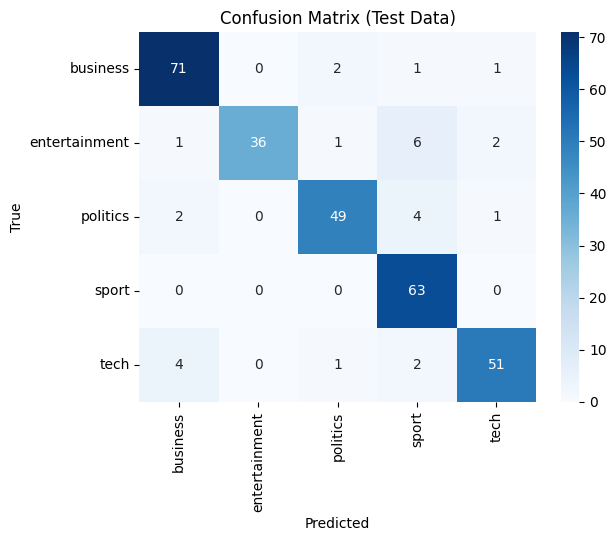

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Considering different values of hiperparameters**

   n_topics  accuracy
0         5  0.906040
1        10  0.926174
2        15  0.936242
3        20  0.939597
4        30  0.919463


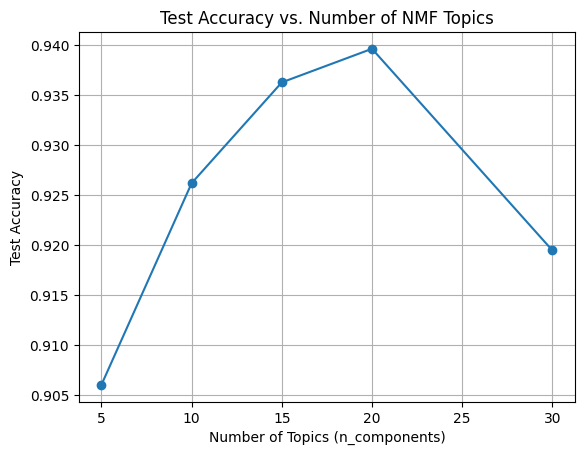

In [ ]:
results = []

for n_topics in [5, 10, 15, 20, 30]:
    nmf = NMF(n_components=n_topics, random_state=42)
    W_train = nmf.fit_transform(X_train_tfidf)
    W_test = nmf.transform(X_test_tfidf)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(W_train, y_train)
    y_test_pred = clf.predict(W_test)
    acc = accuracy_score(y_test, y_test_pred)

    results.append({'n_topics': n_topics, 'accuracy': acc})

results_df = pd.DataFrame(results)
print(results_df)

# Plot
plt.plot(results_df['n_topics'], results_df['accuracy'], marker='o')
plt.title("Test Accuracy vs. Number of NMF Topics")
plt.xlabel("Number of Topics (n_components)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

**Test Data from Competition**

In [ ]:
test_df = pd.read_csv("BBC News Test.csv")

X_test_tfidf = vectorizer.transform(test_df['Text'])
W_test = nmf.transform(X_test_tfidf)

y_test_pred = clf.predict(W_test)

submission = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': y_test_pred
})

print(len(test_df))
print(len(submission))

submission.to_csv("submission.csv", index=False)
submission.head()

735
735


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport


**References**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction


https://github.com/topics/topic-modeling


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://www.kaggle.com/c/learn-ai-bbc/code